<a href="https://colab.research.google.com/github/EAFIT-BI/Business-Analytics---2025-I/blob/main/%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

## Caso 1

In [1]:
# Llamamos las librerías
import numpy as np
import pandas as pd

In [2]:
# Generamos los datos para la construcción del árbol
datos = pd.DataFrame({'Tiempo disponible': [5,3,1,4,2],
                      'Nivel de dificultad': [0,1,2,0,2],
                      'Estudia': ['no', 'si', 'si', 'no', 'si']})
# Visualizamos la información
datos

,Tiempo disponible,Nivel de dificultad,Estudia
0,5,0,no
1,3,1,si
2,1,2,si
3,4,0,no
4,2,2,si


In [3]:
# Instanciamos el modelo del árbol
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()

# Separamos la característica objetivo de los datos
X = datos.drop('Estudia', axis=1)
y = datos['Estudia']

# Entrenamos el modelo
modelo.fit(X, y)

DecisionTreeClassifier()

In [4]:
# Visualizamos el árbol que se contruye
from sklearn.tree import export_graphviz
export_graphviz(modelo, out_file='arbol.dot', feature_names=X.columns)
# visualizamos (guardamos la figura del árbol)
!dot -Tpng arbol.dot -o arbol.png

In [5]:
from sklearn.tree import export_text
# Visualizamos el esquema textual
print(export_text(modelo, feature_names = list(X.columns.values)))

|--- Tiempo disponible <= 3.50
|   |--- class: si
|--- Tiempo disponible >  3.50
|   |--- class: no



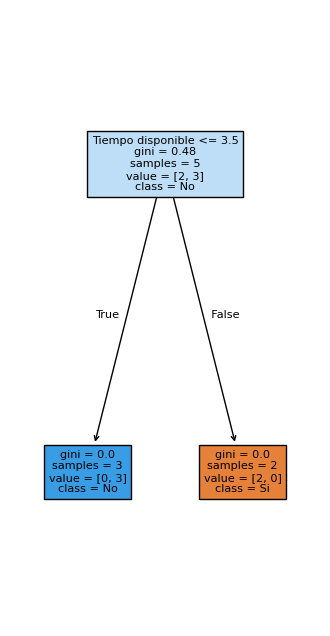

In [6]:
# Otra forma de visualizar el árbol es:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (4,8))
tree.plot_tree(modelo, feature_names = X.columns,
          class_names = ['Si','No'], filled = True);

## Caso 2

In [7]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv('/content/auto-mpg.data-original', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0
405,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0


In [8]:
# Separamos las matrices
X = dataset.drop('Origin', axis=1)
y = dataset['Origin']

# Particionamos en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state =42, stratify = y)

In [9]:
# Instanciamos el modelo
modelo = DecisionTreeClassifier()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

# Calculamos el reporte de desempeño para entrenamiento y test
from sklearn.metrics import classification_report
print(classification_report(y_train, modelo.predict(X_train)))
print(classification_report(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       203
         2.0       1.00      1.00      1.00        58
         3.0       1.00      1.00      1.00        63

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95        51
         2.0       0.67      0.67      0.67        15
         3.0       0.65      0.69      0.67        16

    accuracy                           0.84        82
   macro avg       0.76      0.77      0.76        82
weighted avg       0.85      0.84      0.84        82

